In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [225]:
df = pd.read_csv('housing.csv', sep=r"\s+", header=None)

columns = ["CrimeRate","Location","NonRetailArea","River","Nox","Room","Age","Distance","Bathroom","Tax","Area","Price","State","Year"]
df.columns = columns

print(df.head())

   CrimeRate  Location  NonRetailArea  River    Nox   Room   Age  Distance  \
0    0.00632      18.0           2.31      0  0.538  6.575  65.2    4.0900   
1    0.02731       0.0           7.07      0  0.469  6.421  78.9    4.9671   
2    0.02729       0.0           7.07      0  0.469  7.185  61.1    4.9671   
3    0.03237       0.0           2.18      0  0.458  6.998  45.8    6.0622   
4    0.06905       0.0           2.18      0  0.458  7.147  54.2    6.0622   

   Bathroom    Tax  Area   Price  State  Year  
0         1  296.0  15.3  396.90   4.98  24.0  
1         2  242.0  17.8  396.90   9.14  21.6  
2         2  242.0  17.8  392.83   4.03  34.7  
3         3  222.0  18.7  394.63   2.94  33.4  
4         3  222.0  18.7  396.90   5.33  36.2  


In [226]:
print(df.columns)

Index(['CrimeRate', 'Location', 'NonRetailArea', 'River', 'Nox', 'Room', 'Age',
       'Distance', 'Bathroom', 'Tax', 'Area', 'Price', 'State', 'Year'],
      dtype='object')


In [227]:
# Handling Missing data

In [228]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 CrimeRate        0
Location         0
NonRetailArea    0
River            0
Nox              0
Room             0
Age              0
Distance         0
Bathroom         0
Tax              0
Area             0
Price            0
State            0
Year             0
dtype: int64


In [229]:
df.fillna(df.mean(),inplace = True)

In [230]:
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


In [231]:
df = df.drop_duplicates()


In [232]:
# Normalization

In [233]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['CrimeRate', 'Location', 'NonRetailArea', 'River', 'Nox', 'Room', 'Age',
       'Distance', 'Bathroom', 'Tax', 'Area', 'Price', 'State', 'Year']

scaler = MinMaxScaler(feature_range=(0,1))
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [234]:
x = df.drop(columns=["Price"])
y = df["Price"]

In [235]:
# Heatmap And Scatter plog

In [236]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

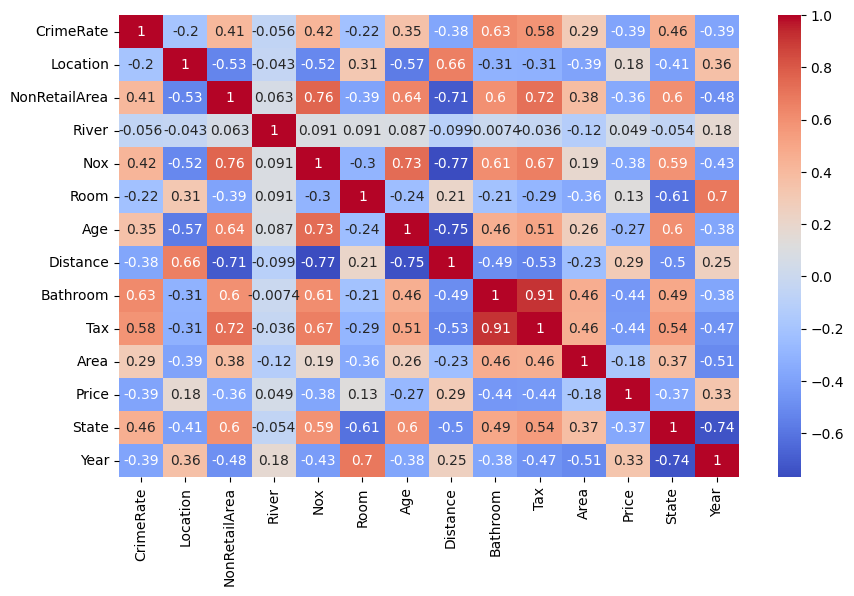

In [237]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

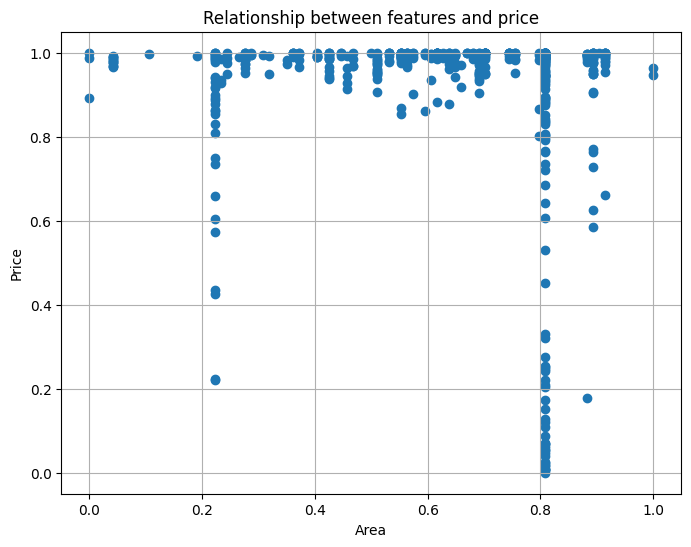

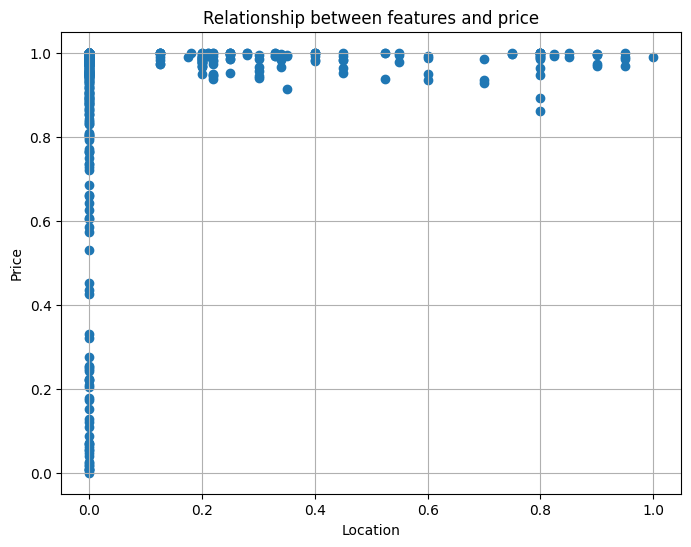

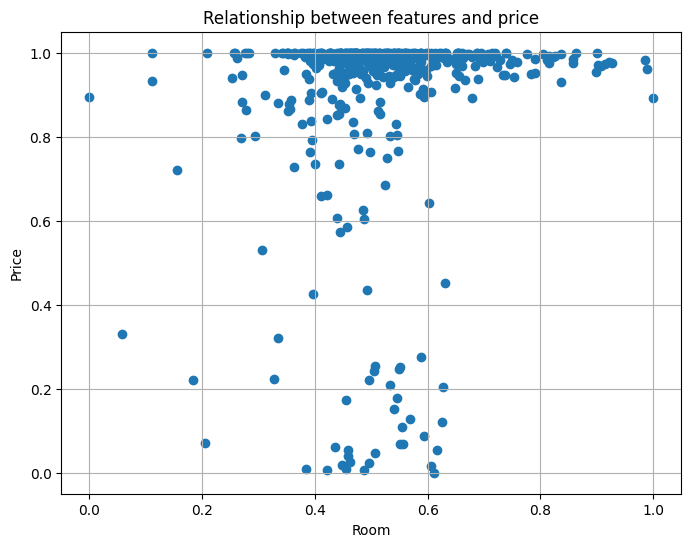

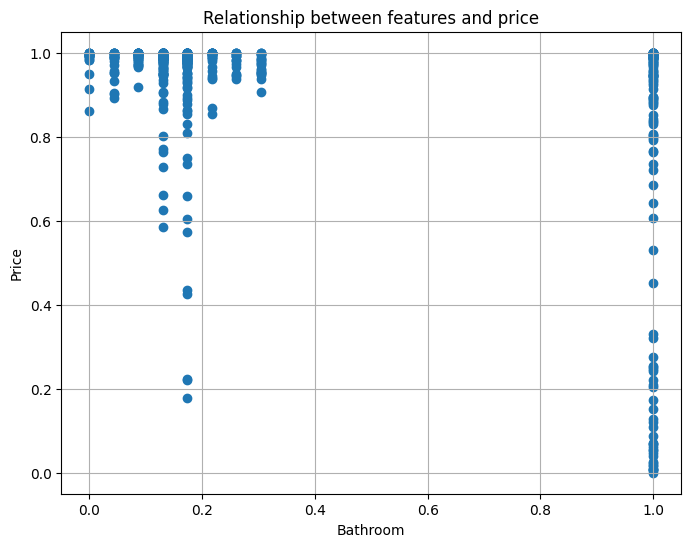

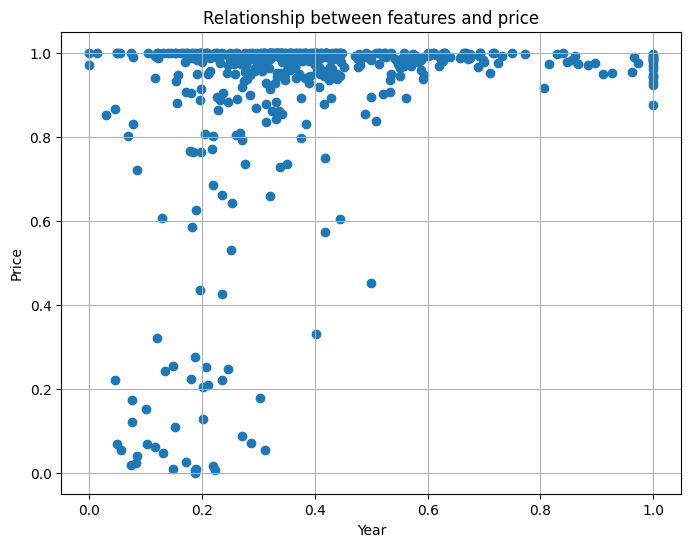

In [238]:
features = ["Area","Location","Room","Bathroom","Year"]

for feature in features:
    plt.figure(figsize=(8,6))
    plt.scatter(df[feature], df["Price"])

    plt.title(f'Relationship between features and price')
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

In [239]:
# Linear regression and matrix MRSE

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.19781505638260916


In [241]:
# Polynomial regression 

In [242]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_ploy_test = poly.transform(x_test)


model3 = LinearRegression()
model3.fit(x_poly_train,y_train)


y_pred_poly = model3.predict(x_ploy_test)

rmse_poly = np.sqrt(mean_squared_error(y_test,y_pred_poly))
print(f"RMSE: {rmse_poly}")


RMSE: 0.18569627683566992
